In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **NLU(Natural Language Understanding)**

### **Search OpenAI GPT3**

### **Other Sequence Problems**

**One To Many (One Input  & Output is in Sequence)**

**Many to One (Time Series Forecasting)**

**Many to Many (Unsynchronized) [Google Translate]**

**Many to Many (Synchronized)**

## **What We Are Going To Cover**

**Downloading & Preparing Text Dataset**

**Prepare Data text for Modelling**

**Setting Up Multiple Modeelling Using Recurrent Neural Network (RNN)**

**Find Most Wrong Prediction Examples**

**Using Model What We've Built to make Predictions on text from the wild**

## **NLP Inputs and Outputs**

**Text--NumericalEncoding--Inputs--M.L Algorithm--Outputs -- Predicted Outputs**

**Text--Outputs**

## **Recurrent Neural Network**

 ## **Architecture Of RNN**

**Input Layer**

**Text Vectorization Layer(Makes Inputs Sequences in Numbers)**

**Embedding (Turn Mapping Text  into Embedding Matrix)**

**RNN Cell (Return Vector for Whole Sequence)**

**Fully Connected Layer**

**Output layer**

**Pooling Layer (Reduced The Dimensionally Of Learned Sequence Features)**

**Output Activations**

## **NLP**

**NLP Has a Goal of Deriving Information out of Natural Language (Could be Sequences of text or Speech). Another Common Term for NLP Problem is Sequence to Sequence (Seq 2 Seq)**

In [2]:
# Get Helper Function

!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2022-04-16 19:08:10--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-04-16 19:08:10 (48.0 MB/s) - ‘helper_functions.py’ saved [10246/10246]



## **Import Seies Of Helper Function from Helper.py**

In [3]:
from helper_functions import unzip_data, create_tensorboard_callback, plot_loss_curves, pred_and_plot, compare_historys

## **Get Text Dataset**

**The Dataset You are Going to Be Used is Kaggle NLP Dataset (Text Samples of Tweets as Disaster or Not)**

In [4]:
!wget https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip

#Unzip Data

unzip_data('nlp_getting_started.zip')

--2022-04-16 19:08:10--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.204.128, 64.233.189.128, 108.177.97.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.204.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.009s  

2022-04-16 19:08:10 (67.2 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



## **Becoming One With Data**

**To Visualize our Text Samples , We First Have to Read them, one way to do so with python. But I Prefer to read in Straight way . So, Another Way to do so with pandas**


In [5]:
import pandas as pd
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


### **Shuffling Training Dataframe**

In [6]:
train_df_shuffled = train_df.sample(frac=1, random_state=42)

train_df_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [7]:
#What Does Test DataFrame Look Like 

test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [8]:
train_df.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [9]:
# How Many Total Samples

len(train_df), len(test_df)

(7613, 3263)

In [10]:
# Lets Visualize Some Random Training Samples

import random 
random_index = random.randint(0, len(train_df)-5)
for row in train_df_shuffled[['text', 'target']][random_index : random_index+5].itertuples():

  _,text,target= row
  print(f"Target: {target}" ,  "(Read Disaster)" if target > 0  else "(Not Real Disaster)")
  print(f"text L \n{text} \n")
  print("---\n")

Target: 1 (Read Disaster)
text L 
Madhya Pradesh Train Derailment: Village Youth Saved Many Lives: A group of villagers saved over 70 passengers' lives after two train... 

---

Target: 1 (Read Disaster)
text L 
Could a drone cause an airplane accident? Pilots worried about use of drones esp. in close vicinity of airports http://t.co/kz35rGngJF # 

---

Target: 0 (Not Real Disaster)
text L 
@funkflex yo flex im here https://t.co/2AZxdLCXgA 

---

Target: 0 (Not Real Disaster)
text L 
My Dad a screaming coach always gave his vocal chords quite the workout on the field. http://t.co/axVQ80RbYJ #FunnyDadCoach 

---

Target: 0 (Not Real Disaster)
text L 
Add these items to your everyday eating habits. Please do the research on how to take with your bloodÛ_ https://t.co/LnpsCaDaXr 

---



## **Splitting Dataset into Train , Test And Validation**

In [11]:
from sklearn.model_selection import train_test_split

train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_df_shuffled['text'].to_numpy(),
                                                                            train_df_shuffled['target'].to_numpy(),
                                                                            test_size=0.1, random_state=42)

In [12]:
#Check The Lengths

len(train_sentences), len(train_labels), len(val_sentences), len(val_labels)

(6851, 6851, 762, 762)

In [13]:
# Check The First Ten Samples

train_sentences[:10], train_labels[:10]

(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
        'Somehow find you and I collide http://t.co/Ee8RpOahPk',
        '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
        'destroy the free fandom honestly',
        'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
        '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
        'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
       dtype=object), array([0, 

## **Converting Text Into Numbers**

**Tokenization ( Straight Mapping From Token to number (Can be Modelled But Quickly get too big)**

**Embedding (Richer Representation of Relationships between Tokens (can be Limit size + can be Learned**

**Search Word to Vec (Also Have Tensorflow Hub pretrained Word Embedding)**

## **Converting Text into Numbers**

**These Are Few Ways to do this, Namely:**

**Tokenization(Direct Mapping of a Token ( A Token could be Word or Character) to Number**

**Embedding (Create Matrix Of Feature Vector of Each Token (The Size of Feature Vector can be Defined and This Embedding can be Learned)**




In [14]:
#Text Vectorization (Tokenization)

train_sentences[:5]

array(['@mogacola @zamtriossu i screamed after hitting tweet',
       'Imagine getting flattened by Kurt Zouma',
       '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
       "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
       'Somehow find you and I collide http://t.co/Ee8RpOahPk'],
      dtype=object)

In [15]:
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

In [16]:
from pandas.core.common import standardize_mapping
#Use Default Text Vectorization Parameters

text_vectorizor = TextVectorization(max_tokens=None,
                                    standardize = 'lower_and_strip_punctuation',
                                    split='whitespace',
                                    ngrams=None,
                                    output_mode='int',
                                    output_sequence_length=None,
                                    pad_to_max_tokens=False)

In [17]:
# Find To Average Number of Tokens (Words) into Training Tweets

round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))


15

In [18]:
# Setup Text Vectorization Variables

max_vocab_length = 1000
max_length = 15 
text_vectorizor = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode = 'int',
                                    output_sequence_length=max_length)

In [19]:
#Fit The Text Vectorizor to The Training Text

text_vectorizor.adapt(train_sentences)

In [20]:
train_sentences[:10]

array(['@mogacola @zamtriossu i screamed after hitting tweet',
       'Imagine getting flattened by Kurt Zouma',
       '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
       "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
       'Somehow find you and I collide http://t.co/Ee8RpOahPk',
       '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
       'destroy the free fandom honestly',
       'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
       '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
       'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
      dtype=object)

In [21]:
#Create A Sample Sentences and Tokenize it 

sample_sentence = 'There is A Flood in My Street'

text_vectorizor([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[ 74,   9,   3, 232,   4,  13, 698,   0,   0,   0,   0,   0,   0,
          0,   0]])>

In [22]:
#Choose A Random Sentence From  Training Dataset  and Tokenize it

random_sentence = random.choice(train_sentences)
print(f"Original Text : \n {random_sentence} \n\nVecorized Version:")
text_vectorizor([random_sentence])

Original Text : 
 Does homeowners insurance cover water damage? Here are some good things to know. http://t.co/0uSDI5JCHo http://t.co/xyg7JhRjoF 

Vecorized Version:


<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[350,   1, 887,   1, 190, 233, 140,  22,  82, 136, 429,   5, 106,
          1,   1]])>

In [23]:
# Get The Unique Words in the Vocabulary

words_in_vocab = text_vectorizor.get_vocabulary()
top_5_words = words_in_vocab[:5]
bottom_5_words = words_in_vocab[:5]
print(f"Number of Words in Vocab : {len(words_in_vocab)}")
print(f"5 Most Common Words  : {top_5_words}")
print(f"5 Least Common Words L {bottom_5_words}")

Number of Words in Vocab : 1000
5 Most Common Words  : ['', '[UNK]', 'the', 'a', 'in']
5 Least Common Words L ['', '[UNK]', 'the', 'a', 'in']


## **Create An Embedding Using Embedding Layer**

**To Make our Embedding, We are Going to used Tensorflow Embedding Model**

**The Parameters we care most about for Our Embedding layer:**

**`Input-Dim` = The Size of Vocabulary**

**`Output-Dim` = the size of Output Embedding Vector**

**`Input-Length` = Length of Sequence Being Passed to the Embedding layer**


In [24]:
from tensorflow.keras import layers

embedding=layers.Embedding(input_dim = max_vocab_length,
                           output_dim = 128,
                           input_length = max_length)

embedding

In [25]:
# Get A Random  Sentence From Training Set 

random_sentence = random.choice(train_sentences)
print(f"Original Text : \n{random_sentence} \n\nEmbedded Version:")

#Embed The Random Sentence(Turn it into Dense Vector of Fixed Size)

sample_embed = embedding(text_vectorizor([random_sentence]))

#Check out Single Token's Embedding 

sample_embed[0][0], sample_embed[0][0].shape, random_sentence[0], random_sentence



Original Text : 
@horiikawa i played online last night and got my ass obliterated 

Embedded Version:


(<tf.Tensor: shape=(128,), dtype=float32, numpy=
 array([ 2.2218693e-02,  3.8663279e-02, -4.4770647e-02,  4.9715068e-02,
        -3.7576664e-02,  4.6038095e-02, -3.2143012e-02, -4.9524009e-02,
         1.5204120e-02, -9.8752603e-03,  2.8384794e-02, -3.0897081e-02,
         3.8685426e-03,  2.4552409e-02,  2.1071736e-02,  2.2044424e-02,
        -7.0592165e-03,  2.0528425e-02,  4.1181479e-02,  9.2125759e-03,
        -3.0378476e-03, -6.5832622e-03,  3.2101870e-03, -4.5518268e-02,
         4.7604766e-02, -2.0774364e-02,  3.8259637e-02,  4.8490617e-02,
         1.7524984e-02,  4.7521975e-02, -2.4694908e-02, -2.3933137e-02,
        -4.6931006e-02, -9.7130314e-03,  4.3542016e-02, -5.7545193e-03,
        -3.2352854e-02,  3.3021454e-02,  1.9031469e-02,  4.1083228e-02,
         3.7477676e-02, -1.1128474e-02, -4.9826313e-02,  2.2374641e-02,
        -4.2166889e-02,  3.7262943e-02,  4.3262113e-02,  2.8208796e-02,
        -1.6248859e-02, -2.5971644e-03, -7.1104653e-03, -3.5398148e-02,
         2.2418

## **Modelling A Text Dataset**

**Now We've A Got Way to Turn out Text Sequences into Numbers**

**We'll Start With Baseline and move on from here**


**Model-0 : Naive Bayes(Baseline)**

**Model-1: Feed Forward  Neural Network (Dense Model)**

**Model-2: LSTM (RNN)**

**Model-3: GRU(RNN)**

**Model-4 : Bi-Directional-LSTM-Model(RNN)**

**Model-5: 1-D  Convolutional Neural Network (CNN)**

**Model-6 : Tensorflow Hub Pretrained Feature Extractor Using Transfer Learning**

**Model-7: Same As Model 6 With 10% of Training Data**

## **Model - 0 (Getting Baseline)**

**It is Important to Create Baseline for Machine Learning Model modelling Experiments, so that you can get Benchmark for Future experiments**

**To Create Baseline, We Usedd Sklearn Multinominal Naive Bayes Using TF-IDF formula to convert Words into Numbers**

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [27]:
#Create Tokenization & Modelling Pipeline

model_0 = Pipeline([
                    ('tfidf', TfidfVectorizer()),
                    ('clf', MultinomialNB())
])

#Fit-The Pipeline

model_0.fit(train_sentences, train_labels)

#Evaluate Baseline Model

baseline_score = model_0.score(val_sentences, val_labels)
print(f"Our Baseline Model Archives Accuracy of : {baseline_score * 100 :.2f}%")

Our Baseline Model Archives Accuracy of : 79.27%


In [28]:
# Make predictions
baseline_preds = model_0.predict(val_sentences)
baseline_preds[:20]

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1])

In [29]:
#Create An Evaluation Function for Our Model

# We Could Evaluate All our Model's Prediction With Different Metrics Everytime, However this Will be Create With A Function 
# Accuracy, Precisiom Recall, F1-Score

from sklearn.metrics import accuracy_score, precision_recall_fscore_support

In [30]:
def calculate_results(y_true, y_pred):

  '''
  Calculates Model Accuracy, Precision, Recall and F1-Score of Binary Classification Model
  '''

  # Calculate Model Accuracy

  model_accuracy = accuracy_score(y_true, y_pred)*100

  #Calculate  Precision, Recall and F1-Score

  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average = 'weighted')

  model_results = {'accuracy' : model_accuracy,
                   'precision'  : model_precision,
                   'Recall' : model_recall,
                   'F1' : model_f1}

  return model_results

In [31]:
#Get Baseline Results

baseline_results = calculate_results(y_true=val_labels,
                                     y_pred=baseline_preds)
baseline_results

{'F1': 0.7862189758049549,
 'Recall': 0.7926509186351706,
 'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173}

## **Model - One : Simple Dense Model**



In [32]:
#Create Tensorboard Callback (Need to Create A New one For Each Model)

from helper_functions import  create_tensorboard_callback
# Create A Directory to Save Tensorboard Logs 

SAVE_DIR = 'model_logs'

In [33]:
#Build Model With Functional API

from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype=tf.string)
x=text_vectorizor(inputs)
x=embedding(x)
x=layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model_1 = tf.keras.Model(inputs, outputs, name='model_1_dense')

In [34]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           128000    
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 128,129
Trainable params: 128,129
Non-t

In [35]:
#Compile The Model

model_1.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

#Fit The Model

model_1_history = model_1.fit(x=train_sentences,
                              y=train_labels,
                              epochs=5,
                              validation_data = (val_sentences, val_labels),
                              callbacks = [create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                       experiment_name='Model_1_Dense')])

Saving TensorBoard log files to: model_logs/Model_1_Dense/20220416-190817
Epoch 1/5
215/215 [==============================] - 9s 12ms/step - loss: 0.6221 - accuracy: 0.6736 - val_loss: 0.5590 - val_accuracy: 0.7349
Epoch 2/5
215/215 [==============================] - 3s 12ms/step - loss: 0.4917 - accuracy: 0.7830 - val_loss: 0.4994 - val_accuracy: 0.7703
Epoch 3/5
215/215 [==============================] - 2s 11ms/step - loss: 0.4378 - accuracy: 0.8085 - val_loss: 0.4857 - val_accuracy: 0.7769
Epoch 4/5
215/215 [==============================] - 2s 10ms/step - loss: 0.4100 - accuracy: 0.8178 - val_loss: 0.4822 - val_accuracy: 0.7677
Epoch 5/5
215/215 [==============================] - 2s 11ms/step - loss: 0.3947 - accuracy: 0.8257 - val_loss: 0.4890 - val_accuracy: 0.7769


In [36]:
#Check The Results

model_1.evaluate(val_sentences, val_labels)

24/24 [==============================] - 0s 8ms/step - loss: 0.4890 - accuracy: 0.7769


[0.4890008866786957, 0.7769029140472412]

In [37]:
# Make Some Prediction and Evaluate Those

model_1_pred_probs = model_1.predict(val_sentences)
model_1_pred_probs.shape

(762, 1)

In [38]:
#Look at Single Prediction

model_1_pred_probs[:1]

array([[0.48593023]], dtype=float32)

In [39]:
#Convert Model Predictions Probability to label Format

model_1_preds = tf.squeeze(tf.round(model_1_pred_probs))
model_1_preds[:20]

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0.], dtype=float32)>

In [40]:
#Calculate Our Model-1-results

model_1_results = calculate_results(y_true = val_labels,
                                    y_pred = model_1_preds)

model_1_results

{'F1': 0.7734519762210931,
 'Recall': 0.7769028871391076,
 'accuracy': 77.69028871391076,
 'precision': 0.7822241302284023}

In [41]:
baseline_results

{'F1': 0.7862189758049549,
 'Recall': 0.7926509186351706,
 'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173}

In [42]:
import numpy as np
np.array(list(model_1_results.values())) > np.array(list(baseline_results.values()))

array([False, False, False, False])

## **Visualizing Learned Embedding**



In [43]:
#Get The Vocabulary From The Text Vectorization

words_in_vocab =  text_vectorizor.get_vocabulary()
len(words_in_vocab), words_in_vocab[:10]

(1000, ['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is'])

In [44]:
# Model No 1 Summary

model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           128000    
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 128,129
Trainable params: 128,129
Non-t

In [45]:
# # Get the weight matrix of embedding layer 
# # (these are the numerical patterns between the text in the training dataset the model has learned)
# embed_weights = model_1.get_layer("embedding_1").get_weights()[0]
# print(embed_weights.shape) # same size as vocab size and embedding_dim (each word is a embedding_dim size vector)

In [46]:
# Now We have got Embedding matrix of our model. let see how they can visualize it



In [47]:
# Get the vocabulary from the text vectorization layer
words_in_vocab = text_vectorizor.get_vocabulary()
len(words_in_vocab), words_in_vocab[:10]

(1000, ['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is'])

In [48]:
# # Get the weight matrix of embedding layer 
# # (these are the numerical patterns between the text in the training dataset the model has learned)
# embed_weights = model_1.get_layer("embedding_1").get_weights()[0]
# print(embed_weights.shape) # same size as vocab size and embedding_dim (each word is a embedding_dim size vector)

In [49]:
# #Create Embedding Files (We have Got this from Tensorflow's Word Embedding Documentation)

# import io

# # Create output writers
# out_v = io.open("embedding_vectors.tsv", "w", encoding="utf-8")
# out_m = io.open("embedding_metadata.tsv", "w", encoding="utf-8")

# # Write embedding vectors and words to file
# for num, word in enumerate(words_in_vocab):
#   if num == 0: 
#      continue # skip padding token
#   vec = embed_weights[num]
#   out_m.write(word + "\n") # write words to file
#   out_v.write("\t".join([str(x) for x in vec]) + "\n") # write corresponding word vector to file
# out_v.close()
# out_m.close()

# # Download files locally to upload to Embedding Projector
# try:
#   from google.colab import files
# except ImportError:
#   pass
# else:
#   files.download("embedding_vectors.tsv")
#   files.download("embedding_metadata.tsv")

In [50]:
# import io

# # Create output writers
# out_v = io.open("embedding_vectors.tsv", "w", encoding="utf-8")
# out_m = io.open("embedding_metadata.tsv", "w", encoding="utf-8")

# # Write embedding vectors and words to file
# for num, word in enumerate(words_in_vocab):
#   if num == 0: 
#      continue # skip padding token
#   vec = embed_weights[num]
#   out_m.write(word + "\n") # write words to file
#   out_v.write("\t".join([str(x) for x in vec]) + "\n") # write corresponding word vector to file
# out_v.close()
# out_m.close()

# # Download files locally to upload to Embedding Projector
# try:
#   from google.colab import files
# except ImportError:
#   pass
# else:
#   files.download("embedding_vectors.tsv")
#   files.download("embedding_metadata.tsv")

## **Recurrent-Neural-Network(RNN)**


**RNN are Usefulfor Sequence Data. The Premise Of Recurrent Neural Network is to Use Representation of Previous input to aid the representation of later input**

## **Architecture of RNN**

**Text -- Text-Vectorization -- Embedding-layer -- Recurrent Layers -- Dense Layers -- Outputs**



## **Model-2: LSTM (Long Short Term Memory)**

**LSTM(Long Short Term Memory (one of the Most Popular LSTM cells)**

**Sutructure of RNN typically looks like this**

**inputs(Text) -> Tokenize -> Embedding -> Layers (RNN/Dense) -> Output (label Probability)**


In [51]:
#Create LSTM Model

from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype=tf.string)
x=text_vectorizor(inputs)
x = embedding(x)
# x = layers.LSTM(64, return_sequences=True)(x)
x = layers.LSTM(64)(x)
# x= layers.Dense(64, activation='relu')(x)
outputs = layers.Dense(1,activation='sigmoid')(x)
model_2 = tf.keras.Model(inputs, outputs, name='Model_2_LSTM')

In [52]:
# Get The Summary

model_2.summary()

Model: "Model_2_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           128000    
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 177,473
Trainable params: 177,473
Non-trainable params: 0
________________________________________________

In [53]:
#Compile The Model

model_2.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [54]:
#Fit The Model

model_2_history = model_2.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data = (val_sentences, val_labels),
                              callbacks = [create_tensorboard_callback(SAVE_DIR,
                                                                       'model_2_LSTM')])

Saving TensorBoard log files to: model_logs/model_2_LSTM/20220416-190842
Epoch 1/5
215/215 [==============================] - 9s 12ms/step - loss: 0.4020 - accuracy: 0.8221 - val_loss: 0.5092 - val_accuracy: 0.7717
Epoch 2/5
215/215 [==============================] - 2s 9ms/step - loss: 0.3756 - accuracy: 0.8316 - val_loss: 0.4806 - val_accuracy: 0.7808
Epoch 3/5
215/215 [==============================] - 2s 9ms/step - loss: 0.3682 - accuracy: 0.8371 - val_loss: 0.4798 - val_accuracy: 0.7730
Epoch 4/5
215/215 [==============================] - 2s 9ms/step - loss: 0.3566 - accuracy: 0.8412 - val_loss: 0.4897 - val_accuracy: 0.7743
Epoch 5/5
215/215 [==============================] - 2s 9ms/step - loss: 0.3367 - accuracy: 0.8504 - val_loss: 0.5416 - val_accuracy: 0.7756


In [55]:
# Make Some Prediction and Evaluate Those

model_2_pred_probs = model_2.predict(val_sentences)
model_2_pred_probs.shape

(762, 1)

In [56]:
# Make Prediction With LSTM Model

model_2_preds = tf.squeeze(tf.round(model_2_pred_probs))
model_2_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [57]:
# Calculate Model 2 Results

model_2_results = calculate_results(y_true=val_labels,
                                    y_pred = model_2_preds)

model_2_results

{'F1': 0.7732287214395843,
 'Recall': 0.7755905511811023,
 'accuracy': 77.55905511811024,
 'precision': 0.7780461459912817}

In [58]:
baseline_results

{'F1': 0.7862189758049549,
 'Recall': 0.7926509186351706,
 'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173}

### **Get Model 3**

In [59]:
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype=tf.string)
x=text_vectorizor(inputs)
x = embedding(x)
x = layers.LSTM(64, return_sequences=True)(x)
x = layers.LSTM(64)(x)
x= layers.Dense(64, activation='relu')(x)
outputs = layers.Dense(1,activation='sigmoid')(x)
model_3 = tf.keras.Model(inputs, outputs, name='Model_3_LSTM')

In [60]:
model_3.summary()

Model: "Model_3_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           128000    
                                                                 
 lstm_1 (LSTM)               (None, 15, 64)            49408     
                                                                 
 lstm_2 (LSTM)               (None, 64)                33024     
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                      

In [61]:
#Compile The Model

model_3.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [62]:
#Fit The Model

model_3_history = model_3.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data = (val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     'model_3_LSTM')])

Saving TensorBoard log files to: model_logs/model_3_LSTM/20220416-190908
Epoch 1/5
215/215 [==============================] - 8s 18ms/step - loss: 0.3771 - accuracy: 0.8397 - val_loss: 0.5232 - val_accuracy: 0.7703
Epoch 2/5
215/215 [==============================] - 3s 14ms/step - loss: 0.3264 - accuracy: 0.8641 - val_loss: 0.5726 - val_accuracy: 0.7572
Epoch 3/5
215/215 [==============================] - 3s 14ms/step - loss: 0.2974 - accuracy: 0.8704 - val_loss: 0.5629 - val_accuracy: 0.7638
Epoch 4/5
215/215 [==============================] - 3s 14ms/step - loss: 0.2786 - accuracy: 0.8772 - val_loss: 0.6008 - val_accuracy: 0.7467
Epoch 5/5
215/215 [==============================] - 3s 14ms/step - loss: 0.2577 - accuracy: 0.8895 - val_loss: 0.6807 - val_accuracy: 0.7467


In [63]:
# Make Some Prediction and Evaluate Those

model_3_pred_probs = model_3.predict(val_sentences)
model_3_pred_probs.shape

(762, 1)

In [64]:
# Make Predictions With LSTM Model  

model_3_preds = tf.squeeze(tf.round(model_3_pred_probs))
model_3_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [65]:
# Calculate Model 3 Results

model_3_results = calculate_results(y_true = val_labels,
                                    y_pred = model_3_preds)
model_3_results

{'F1': 0.7446319510274133,
 'Recall': 0.7467191601049868,
 'accuracy': 74.67191601049869,
 'precision': 0.747413483132738}

In [66]:
baseline_results

{'F1': 0.7862189758049549,
 'Recall': 0.7926509186351706,
 'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173}

#### **Model No 4**

In [67]:
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype=tf.string)
x=text_vectorizor(inputs)
x = embedding(x)
# x = layers.LSTM(64, return_sequences=True)(x)
x = layers.LSTM(64)(x)
x= layers.Dense(64, activation='relu')(x)
outputs = layers.Dense(1,activation='sigmoid')(x)
model_4 = tf.keras.Model(inputs, outputs, name='Model_4_LSTM')

In [68]:
model_4.summary()

Model: "Model_4_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           128000    
                                                                 
 lstm_3 (LSTM)               (None, 64)                49408     
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                      

In [69]:
# Compile The Model

model_4.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

#Fit The Model

model_4_history = model_4.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data = (val_sentences, val_labels),
                              callbacks = [create_tensorboard_callback(SAVE_DIR,
                                                                       'model_4_LSTN')])

Saving TensorBoard log files to: model_logs/model_4_LSTN/20220416-190933
Epoch 1/5
215/215 [==============================] - 5s 12ms/step - loss: 0.3561 - accuracy: 0.8502 - val_loss: 0.6390 - val_accuracy: 0.7572
Epoch 2/5
215/215 [==============================] - 2s 9ms/step - loss: 0.2733 - accuracy: 0.8835 - val_loss: 0.6324 - val_accuracy: 0.7480
Epoch 3/5
215/215 [==============================] - 2s 9ms/step - loss: 0.2539 - accuracy: 0.8910 - val_loss: 0.6446 - val_accuracy: 0.7467
Epoch 4/5
215/215 [==============================] - 2s 11ms/step - loss: 0.2301 - accuracy: 0.9005 - val_loss: 0.8232 - val_accuracy: 0.7546
Epoch 5/5
215/215 [==============================] - 3s 14ms/step - loss: 0.2160 - accuracy: 0.9086 - val_loss: 0.7935 - val_accuracy: 0.7454


In [70]:
# Make Some Prediction and Evaluate Those

model_4_pred_probs = model_4.predict(val_sentences)
model_4_pred_probs.shape

(762, 1)

In [71]:
model_4_preds = tf.squeeze(tf.round(model_4_pred_probs))
model_4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 0., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [72]:
# Calculate Model 4 Results

model_4_results = calculate_results(y_true = val_labels,
                                    y_pred = model_4_preds)

model_4_results

{'F1': 0.7436411119830109,
 'Recall': 0.7454068241469817,
 'accuracy': 74.54068241469817,
 'precision': 0.7456573780404198}

In [73]:
baseline_results

{'F1': 0.7862189758049549,
 'Recall': 0.7926509186351706,
 'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173}

## **Model-Three GRU**

**Another Popular and Effective RNN component is GRU or Gated Recurrent Unit**

**The GRU cell has Similar Features to LSTM have less Parameters**


In [74]:
# Build RNN Cell Using GRU Cell

from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype=tf.string)
x=text_vectorizor(inputs)
x= embedding(x)
x=layers.GRU(64, return_sequences= True)(x)
# x=layers.LSTM(42)(x)
# x=layers.GRU(99)(x)
x=layers.Dense(64, activation='relu')(x)
x=layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model_5 = tf.keras.Model(inputs, outputs, name='Model_5_GRU')

In [75]:
# Get A Summary
model_5.summary()

Model: "Model_5_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           128000    
                                                                 
 gru (GRU)                   (None, 15, 64)            37248     
                                                                 
 dense_6 (Dense)             (None, 15, 64)            4160      
                                                                 
 global_average_pooling1d_1   (None, 64)               0         
 (GlobalAveragePooling1D)                              

In [76]:
#Compile The Model

model_5.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit The Model

model_5_history = model_5.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data = (val_sentences, val_labels),
                              callbacks = [create_tensorboard_callback(SAVE_DIR,
                                                                       'model_5_GRU')])

Saving TensorBoard log files to: model_logs/model_5_GRU/20220416-190957
Epoch 1/5
215/215 [==============================] - 5s 12ms/step - loss: 0.3884 - accuracy: 0.8342 - val_loss: 0.5277 - val_accuracy: 0.7730
Epoch 2/5
215/215 [==============================] - 2s 10ms/step - loss: 0.3280 - accuracy: 0.8556 - val_loss: 0.5350 - val_accuracy: 0.7664
Epoch 3/5
215/215 [==============================] - 2s 10ms/step - loss: 0.2898 - accuracy: 0.8730 - val_loss: 0.5704 - val_accuracy: 0.7533
Epoch 4/5
215/215 [==============================] - 2s 10ms/step - loss: 0.2659 - accuracy: 0.8831 - val_loss: 0.7021 - val_accuracy: 0.7559
Epoch 5/5
215/215 [==============================] - 2s 10ms/step - loss: 0.2397 - accuracy: 0.8952 - val_loss: 0.8273 - val_accuracy: 0.7520


In [77]:
# Make Our Prediction with GRU Model

model_5_pred_probs = model_5.predict(val_sentences)
model_5_pred_probs[:10]

array([[0.8491338 ],
       [0.93169975],
       [0.99378794],
       [0.02540666],
       [0.31184602],
       [0.99999464],
       [0.99608046],
       [0.9987062 ],
       [0.7853565 ],
       [0.02763234]], dtype=float32)

In [78]:
# Convert Model 5 Pred Probs into labels

model_5_preds = tf.squeeze(tf.round(model_5_pred_probs))
model_5_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [79]:
# Calculate Model 5 Results

model_5_results = calculate_results(y_true = val_labels,
                                    y_pred = model_5_preds)
model_5_results

{'F1': 0.7495053197991575,
 'Recall': 0.7519685039370079,
 'accuracy': 75.19685039370079,
 'precision': 0.753441444327358}

In [80]:
baseline_results

{'F1': 0.7862189758049549,
 'Recall': 0.7926509186351706,
 'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173}

### **Model No 6**

In [81]:
from tensorflow.keras import layers

inputs = layers.Input(shape=(1,), dtype=tf.string)
x= text_vectorizor(inputs)
x=embedding(x)
x= layers.GRU(64, return_sequences=True)(x)
x=layers.LSTM(64, return_sequences=True)(x)
# x=layers.GRU(99)(x)
x=layers.Dense(64, activation='relu')(x)
x=layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(1,activation='relu')(x)
model_6= tf.keras.Model(inputs, outputs, name='model_6_GRU')

In [82]:
# Get Model Summary

model_6.summary()

Model: "model_6_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           128000    
                                                                 
 gru_1 (GRU)                 (None, 15, 64)            37248     
                                                                 
 lstm_4 (LSTM)               (None, 15, 64)            33024     
                                                                 
 dense_8 (Dense)             (None, 15, 64)            4160      
                                                       

In [83]:
# Compile The Model

model_6.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics=['accuracy'])


# Fit The Model

model_6_history = model_6.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data = (val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     'model_6_GRU')])

Saving TensorBoard log files to: model_logs/model_6_GRU/20220416-191013
Epoch 1/5
215/215 [==============================] - 9s 20ms/step - loss: 0.5060 - accuracy: 0.7964 - val_loss: 0.6246 - val_accuracy: 0.7743
Epoch 2/5
215/215 [==============================] - 3s 15ms/step - loss: 0.3915 - accuracy: 0.8475 - val_loss: 1.0813 - val_accuracy: 0.7677
Epoch 3/5
215/215 [==============================] - 3s 15ms/step - loss: 0.3872 - accuracy: 0.8386 - val_loss: 0.6582 - val_accuracy: 0.7126
Epoch 4/5
215/215 [==============================] - 3s 15ms/step - loss: 0.4067 - accuracy: 0.8462 - val_loss: 0.9691 - val_accuracy: 0.7651
Epoch 5/5
215/215 [==============================] - 3s 15ms/step - loss: 0.3538 - accuracy: 0.8656 - val_loss: 1.3241 - val_accuracy: 0.7730


In [84]:
# Make Predictions With GRU Model

model_6_pred_probs = model_6.predict(val_sentences)
model_6_pred_probs[:10]

array([[0.5393749 ],
       [0.9303001 ],
       [1.6116344 ],
       [0.01919845],
       [0.14982104],
       [2.7591884 ],
       [1.4739642 ],
       [1.1441404 ],
       [0.5068976 ],
       [0.21729761]], dtype=float32)

In [85]:
# Convert Model 6 Pred probs into Labels
model_6_preds = tf.squeeze(tf.round(model_6_pred_probs))
model_6_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 2., 0., 0., 3., 1., 1., 1., 0.], dtype=float32)>

In [86]:
# Calculate Results

model_6_results = calculate_results(y_true = val_labels,
                                    y_pred = model_6_preds )

model_6_results

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'F1': 0.6366190448926375,
 'Recall': 0.6089238845144357,
 'accuracy': 60.892388451443566,
 'precision': 0.716747933860565}

In [87]:
baseline_results

{'F1': 0.7862189758049549,
 'Recall': 0.7926509186351706,
 'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173}

### **Model No 7**

In [88]:
from tensorflow.keras import layers

inputs = layers.Input(shape=(1,), dtype = tf.string)
x=text_vectorizor(inputs)
x= embedding(x)
x=layers.GRU(64, return_sequences=True)(x)
x=layers.LSTM(42, return_sequences=True)(x)
x=layers.GRU(99, return_sequences=True)(x)
x=layers.Dense(64, activation='relu')(x)
x=layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(1,activation='sigmoid')(x)
model_7 = tf.keras.Model(inputs , outputs , name='model_7_GRU')

In [89]:
# Get A Model Summary

model_7.summary()

Model: "model_7_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           128000    
                                                                 
 gru_2 (GRU)                 (None, 15, 64)            37248     
                                                                 
 lstm_5 (LSTM)               (None, 15, 42)            17976     
                                                                 
 gru_3 (GRU)                 (None, 15, 99)            42471     
                                                       

In [90]:
# Compile The Model

model_7.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics=['accuracy'])


#Fit The Model

model_7_history = model_7.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data = (val_sentences, val_labels),
                              callbacks = [create_tensorboard_callback(SAVE_DIR,
                                                                       'model_7_GRU')])

Saving TensorBoard log files to: model_logs/model_7_GRU/20220416-191039
Epoch 1/5
215/215 [==============================] - 11s 27ms/step - loss: 0.3634 - accuracy: 0.8450 - val_loss: 0.5917 - val_accuracy: 0.7690
Epoch 2/5
215/215 [==============================] - 5s 21ms/step - loss: 0.2866 - accuracy: 0.8736 - val_loss: 0.7429 - val_accuracy: 0.7598
Epoch 3/5
215/215 [==============================] - 5s 21ms/step - loss: 0.2521 - accuracy: 0.8918 - val_loss: 0.8851 - val_accuracy: 0.7625
Epoch 4/5
215/215 [==============================] - 5s 22ms/step - loss: 0.2256 - accuracy: 0.9013 - val_loss: 0.8421 - val_accuracy: 0.7480
Epoch 5/5
215/215 [==============================] - 5s 21ms/step - loss: 0.2237 - accuracy: 0.9044 - val_loss: 1.0908 - val_accuracy: 0.7507


In [91]:
# Make Our Prediction With GRU Model

model_7_pred_probs = model_7.predict(val_sentences)
model_7_pred_probs[:10]

array([[0.8896122 ],
       [0.99494755],
       [0.9982504 ],
       [0.03340201],
       [0.18722656],
       [1.        ],
       [0.9992212 ],
       [0.99997485],
       [0.4569583 ],
       [0.00407561]], dtype=float32)

In [92]:
# Convert  Model 7 Pred Probs into labels

model_7_preds = tf.squeeze(tf.round(model_7_pred_probs))
model_7_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 1., 0., 0., 1., 1., 1., 0., 0.], dtype=float32)>

In [93]:
# Calculate Model 7 Results

model_7_results = calculate_results(y_true = val_labels,
                                    y_pred = model_7_preds)
model_7_results

{'F1': 0.7496137854312132,
 'Recall': 0.7506561679790026,
 'accuracy': 75.06561679790026,
 'precision': 0.7503421262065562}

In [94]:
baseline_results

{'F1': 0.7862189758049549,
 'Recall': 0.7926509186351706,
 'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173}

## **Model No Four : Bi-Directional RNN**

**Normal RNN Go From Left to right (Just like you Read English) . However Bidirectional RNN Goes from right to left as well as left to right**



In [95]:
# Build Bi-Directioanl RNN in tensorflow 

from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype=tf.string)
x=text_vectorizor(inputs)
x=embedding(x)
x=layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x)
x= layers.Bidirectional(layers.GRU(64, return_sequences=True))(x)
x=layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model_8 = tf.keras.Model(inputs, outputs, name='model_4_bidirectional')

In [96]:
# Get A Summary

model_8.summary()

Model: "model_4_bidirectional"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           128000    
                                                                 
 bidirectional (Bidirectiona  (None, 15, 128)          98816     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 15, 128)          74496     
 nal)                                                            
                                             

In [97]:
# Compile The Model

model_8.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

#Fit The Model

model_8_history = model_8.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data = (val_sentences, val_labels) ,
                              callbacks = [create_tensorboard_callback(SAVE_DIR,
                                                                       'model_8_bidirectional')])

Saving TensorBoard log files to: model_logs/model_8_bidirectional/20220416-191128
Epoch 1/5
215/215 [==============================] - 14s 31ms/step - loss: 0.3219 - accuracy: 0.8680 - val_loss: 0.6222 - val_accuracy: 0.7533
Epoch 2/5
215/215 [==============================] - 5s 23ms/step - loss: 0.2427 - accuracy: 0.8972 - val_loss: 0.8060 - val_accuracy: 0.7507
Epoch 3/5
215/215 [==============================] - 5s 23ms/step - loss: 0.2118 - accuracy: 0.9079 - val_loss: 0.8337 - val_accuracy: 0.7349
Epoch 4/5
215/215 [==============================] - 5s 23ms/step - loss: 0.2062 - accuracy: 0.9078 - val_loss: 0.9097 - val_accuracy: 0.7533
Epoch 5/5
215/215 [==============================] - 5s 23ms/step - loss: 0.1819 - accuracy: 0.9158 - val_loss: 1.0498 - val_accuracy: 0.7349


In [98]:
# Make Predictions with our Bi-Directional Model

model_8_pred_probs = model_8.predict(val_sentences)
model_8_pred_probs[:10]

array([[0.96299225],
       [0.8106273 ],
       [0.99877495],
       [0.05186384],
       [0.14588991],
       [0.9999466 ],
       [0.9997563 ],
       [0.99444747],
       [0.73938364],
       [0.00458143]], dtype=float32)

In [99]:
# Convert Pred Prob to Pred Labels

model_8_preds = tf.squeeze(tf.round(model_8_pred_probs))
model_8_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [100]:
# Calculate Results of Bi-Directional Model

model_8_results = calculate_results(y_true = val_labels,
                                    y_pred = model_8_preds)
model_8_results

{'F1': 0.7352054728203838,
 'Recall': 0.7349081364829396,
 'accuracy': 73.49081364829397,
 'precision': 0.7358672516681682}

In [101]:
baseline_results

{'F1': 0.7862189758049549,
 'Recall': 0.7926509186351706,
 'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173}

### **Model No 9**

In [102]:
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype=tf.string)
x=text_vectorizor(inputs)
x=embedding(x)
x=layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x)
x=layers.Bidirectional(layers.GRU(64, return_sequences=True))(x)
x=layers.GlobalMaxPooling1D()(x)
outputs=layers.Dense(1,activation='sigmoid')(x)
model_9 = tf.keras.Model(inputs, outputs , name='model_9_bi-directional')

In [103]:
# Get Model Summary

model_9.summary()

Model: "model_9_bi-directional"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           128000    
                                                                 
 bidirectional_2 (Bidirectio  (None, 15, 128)          98816     
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 15, 128)          74496     
 nal)                                                            
                                            

In [104]:
# Compile The Model

model_9.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit The Model

model_9_history = model_9.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data = (val_sentences,val_labels),
                              callbacks = [create_tensorboard_callback(SAVE_DIR,
                                                                       'model_9_bi-directional')])

Saving TensorBoard log files to: model_logs/model_9_bi-directional/20220416-191219
Epoch 1/5
215/215 [==============================] - 14s 31ms/step - loss: 0.3121 - accuracy: 0.8701 - val_loss: 0.7473 - val_accuracy: 0.7520
Epoch 2/5
215/215 [==============================] - 5s 24ms/step - loss: 0.2170 - accuracy: 0.9067 - val_loss: 0.9491 - val_accuracy: 0.7480
Epoch 3/5
215/215 [==============================] - 5s 23ms/step - loss: 0.1865 - accuracy: 0.9177 - val_loss: 0.8375 - val_accuracy: 0.7454
Epoch 4/5
215/215 [==============================] - 5s 23ms/step - loss: 0.1799 - accuracy: 0.9215 - val_loss: 0.9818 - val_accuracy: 0.7533
Epoch 5/5
215/215 [==============================] - 5s 24ms/step - loss: 0.1687 - accuracy: 0.9221 - val_loss: 1.0695 - val_accuracy: 0.7467


In [105]:
# Make Predictions With Our Bi-Directional Model

model_9_pred_probs = model_9.predict(val_sentences)
model_9_pred_probs[:10]

array([[0.08861699],
       [0.84033644],
       [0.9984333 ],
       [0.02075341],
       [0.1549552 ],
       [0.999286  ],
       [0.96411806],
       [0.9357069 ],
       [0.37504596],
       [0.00118519]], dtype=float32)

In [106]:
# Convert Pred Probs to pred labels

model_9_preds = tf.squeeze(tf.round(model_9_pred_probs))
model_9_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 0., 0.], dtype=float32)>

In [107]:
# Calculate Results

model_9_results = calculate_results(y_true = val_labels,
                                    y_pred = model_9_preds)
model_9_results

{'F1': 0.741942730700961,
 'Recall': 0.7467191601049868,
 'accuracy': 74.67191601049869,
 'precision': 0.7524191024021949}

In [108]:
baseline_results

{'F1': 0.7862189758049549,
 'Recall': 0.7926509186351706,
 'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173}

## **CNN For Text (and Other Types Of Sequences)**

**We have Used CNN's for images but images are Typically 2D(height x Width) . However Our Text Data is 1-D**

## **Architecture of CNN 1-D For Text**

**Inputs -- Text-Vectorizational-layer -- Embedding-layer -- Conv-1d-layer -- Max-pooling-layer -- Dense-layer -- Outputs** 

**Typical Sutructure of Conv1D for Our Case is**

**inputs(text) -- Tokenization -- Embedding layer (Typically Conv1D + Pooling) -- Outputs(class Probability)**

## **Model No Five : CONV-1D**

In [109]:
from tensorflow.keras import layers 
embedding_text = embedding(text_vectorizor(['this is A Test Sentence']))
conv_1D = layers.Conv1D(filters = 32,
                        kernel_size=5,
                        activation='relu',
                        padding = 'valid')
conv_1D_output = conv_1D(embedding_text)
max_pool = layers.GlobalMaxPool1D()
max_pool_output = max_pool(conv_1D_output)

## **Create-1-Dimensional Convolutional Layers**

In [110]:
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype=tf.string)
x=text_vectorizor(inputs)
x=embedding(x)
x=layers.Conv1D(filters = 64,
                kernel_size=5,
                activation='relu',
                padding='valid')(x)
x= layers.GlobalMaxPool1D()(x)
x= layers.Dense(64, activation='relu')(x)
outputs=layers.Dense(1, activation='sigmoid')(x)
model_10 = tf.keras.Model(inputs, outputs, name='Model_10_Conv1D')                

In [111]:
# Compile The ConV1D

model_10.compile(loss = 'binary_crossentropy',
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

In [112]:
model_10.summary()

Model: "Model_10_Conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           128000    
                                                                 
 conv1d_1 (Conv1D)           (None, 11, 64)            41024     
                                                                 
 global_max_pooling1d_2 (Glo  (None, 64)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_14 (Dense)            (None, 64)            

In [113]:
# Fit The Model

model_10_history = model_10.fit(train_sentences,
                                train_labels,
                                epochs=5,
                                validation_data = (val_sentences, val_labels),
                                callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                       'model_10_conv-1D')])

Saving TensorBoard log files to: model_logs/model_10_conv-1D/20220416-191314
Epoch 1/5
215/215 [==============================] - 3s 8ms/step - loss: 0.3576 - accuracy: 0.8444 - val_loss: 0.5871 - val_accuracy: 0.7651
Epoch 2/5
215/215 [==============================] - 1s 7ms/step - loss: 0.2886 - accuracy: 0.8770 - val_loss: 0.6571 - val_accuracy: 0.7507
Epoch 3/5
215/215 [==============================] - 1s 7ms/step - loss: 0.2498 - accuracy: 0.8899 - val_loss: 0.7330 - val_accuracy: 0.7677
Epoch 4/5
215/215 [==============================] - 1s 7ms/step - loss: 0.2160 - accuracy: 0.9066 - val_loss: 0.9057 - val_accuracy: 0.7625
Epoch 5/5
215/215 [==============================] - 1s 7ms/step - loss: 0.1783 - accuracy: 0.9216 - val_loss: 1.0608 - val_accuracy: 0.7349


In [114]:
# Make Predictions With Our Conv1D Layer

model_10_pred_probs = model_10.predict(val_sentences)
model_10_pred_probs[:10]

array([[5.5138189e-01],
       [4.8371914e-01],
       [5.3458375e-01],
       [3.9464954e-04],
       [3.3952421e-01],
       [9.9999988e-01],
       [7.1721250e-01],
       [9.9978751e-01],
       [1.7919137e-01],
       [6.9356295e-03]], dtype=float32)

In [115]:
# Convert Model 10 Pred Probs to label

model_10_preds = tf.squeeze(tf.round(model_5_pred_probs))
model_10_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [116]:
# Calculate Results

model_10_results = calculate_results(y_true = val_labels,
                                     y_pred = model_10_preds)
model_10_results

{'F1': 0.7495053197991575,
 'Recall': 0.7519685039370079,
 'accuracy': 75.19685039370079,
 'precision': 0.753441444327358}

In [117]:
baseline_results

{'F1': 0.7862189758049549,
 'Recall': 0.7926509186351706,
 'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173}

## **Model No Six : Tensorflow Hib Pretrained Sentence Encoder**

**Model We've Building (USE for Feature Extractor)**
**U=Universal**
**S=Sentence**
**E=Encoding**



In [118]:
import tensorflow_hub as hub
embed = hub.load('https://tfhub.dev/google/universal-sentence-encoder/4')
embed_samples= embed([sample_sentence,'When You all Universe Sentence Encodes, It Turns into The Numbers'])
print(embed_samples[0][:50])

tf.Tensor(
[-0.01602836  0.01068852  0.02425466 -0.01405769  0.01434424  0.08292625
  0.01963372  0.06160138 -0.003527   -0.01216415  0.00978648 -0.01248498
  0.01232344  0.09748449  0.06141113 -0.03728351  0.01860886 -0.04669853
  0.00413914 -0.06363907 -0.02469896  0.02713691  0.02284443 -0.00210021
 -0.00630594 -0.03964956  0.02220411  0.00115076 -0.03132178  0.00119526
 -0.04012549  0.04561896 -0.01530597 -0.00175917  0.02173134 -0.08450424
  0.03340028  0.04604551 -0.02480248 -0.08681665  0.00702695 -0.00770479
 -0.0143454   0.07814161 -0.10676058 -0.05152997 -0.00858157 -0.03232232
 -0.03871096  0.0258147 ], shape=(50,), dtype=float32)


In [119]:
# Create Keras Layers By Using USE Pretrained Layer From Tensorflow Hub

sentence_encoder_layer = hub.KerasLayer('https://tfhub.dev/google/universal-sentence-encoder/4',
                                        input_shape=[],
                                        dtype=tf.string,
                                        trainable=False,
                                        name='USE')


In [120]:
# Create Model Using Sequential API

model_11 = tf.keras.Sequential([
                                sentence_encoder_layer,
                                layers.Dense(64, activation='relu'),
                                layers.Dense(1,activation='sigmoid')
], name='model_11_USE')

# Compile The Model

model_11.compile(loss = 'binary_crossentropy',
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

In [121]:
# Get Model Summary

model_11.summary()

Model: "model_11_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_16 (Dense)            (None, 64)                32832     
                                                                 
 dense_17 (Dense)            (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [122]:
# Train Classifier on Top of USE Pretrained Model Embedding

model_11_history = model_11.fit(train_sentences,
                                train_labels,
                                epochs=5,
                                validation_data = (val_sentences, val_labels),
                                callbacks = [create_tensorboard_callback(SAVE_DIR,
                                                                         'model_11_tf_sentences_encoder')])

Saving TensorBoard log files to: model_logs/model_11_tf_sentences_encoder/20220416-191357
Epoch 1/5
215/215 [==============================] - 8s 20ms/step - loss: 0.5057 - accuracy: 0.7843 - val_loss: 0.4539 - val_accuracy: 0.7992
Epoch 2/5
215/215 [==============================] - 4s 19ms/step - loss: 0.4143 - accuracy: 0.8168 - val_loss: 0.4437 - val_accuracy: 0.8097
Epoch 3/5
215/215 [==============================] - 4s 19ms/step - loss: 0.4013 - accuracy: 0.8196 - val_loss: 0.4416 - val_accuracy: 0.8136
Epoch 4/5
215/215 [==============================] - 4s 17ms/step - loss: 0.3933 - accuracy: 0.8253 - val_loss: 0.4320 - val_accuracy: 0.8136
Epoch 5/5
215/215 [==============================] - 4s 19ms/step - loss: 0.3862 - accuracy: 0.8302 - val_loss: 0.4294 - val_accuracy: 0.8123


In [123]:
# Make Predictions With USE TFHUB Model

model_11_pred_probs = model_11.predict(val_sentences)
model_11_pred_probs[:10]

array([[0.20785625],
       [0.7980254 ],
       [0.9886059 ],
       [0.22065596],
       [0.747392  ],
       [0.8006787 ],
       [0.98519474],
       [0.9803995 ],
       [0.95341355],
       [0.11006868]], dtype=float32)

In [124]:
#Convert Prediction Probabilities To labels

model_11_preds = tf.squeeze(tf.round(model_11_pred_probs))
model_11_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [125]:
# Calculate Model 11 Performance Metrics 

model_11_results = calculate_results(y_true = val_labels,
                                     y_pred = model_11_preds)
model_11_results

{'F1': 0.8118074135590041,
 'Recall': 0.8123359580052494,
 'accuracy': 81.23359580052494,
 'precision': 0.8123014769092638}

In [126]:
baseline_results

{'F1': 0.7862189758049549,
 'Recall': 0.7926509186351706,
 'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173}

## **Improving Our Model**

**Adding Layers -- Increase Number Of Hidden Units -- Changing Activation Function -- Changing Optimization Function -- Train For Longer**

## **Model No Seven : TF HUB Pretrained USE With 10% of Data**

**Transfer Learning Really Helps When you don't have Large Dataset**

**To See how Our Model Perform on small our dataset, lets replicate model 12 except 10% of data**

In [127]:
#Create Subset of 10% of Training Data (This Method tends to lead Data Leakage)

train_ten_percent = train_df_shuffled[['text', 'target']].sample(frac=0.1, random_state=42)
train_ten_percent.head(), len(train_ten_percent)
train_sentences_10_percent = train_ten_percent['text'].to_numpy()
train_labels_10_percent = train_ten_percent['target'].to_numpy()


In [128]:
# Check Number Of Targets in our Subset of Data

train_ten_percent['target'].value_counts()
train_df_shuffled['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [129]:
# Lets Build Model the Same As Previous Model

#To Recreate A Similar Previous Model, You can Use Tf.keras.models.clone_model()

model_12 = tf.keras.models.clone_model(model_11)

# Compile The Model

model_12.compile(loss = 'binary_crossentropy',
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

In [130]:
# Get A Summary

model_12.summary()

Model: "model_11_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_16 (Dense)            (None, 64)                32832     
                                                                 
 dense_17 (Dense)            (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [131]:
# Fit The Model To the Training 10% of data

model_12_history = model_12.fit(train_sentences,
                                train_labels,
                                epochs=5,
                                validation_data = (val_sentences, val_labels),
                                callbacks = [create_tensorboard_callback(SAVE_DIR,
                                                                         'tf_hub_sentence_encoder_10_percent')])

Saving TensorBoard log files to: model_logs/tf_hub_sentence_encoder_10_percent/20220416-191426
Epoch 1/5
215/215 [==============================] - 7s 21ms/step - loss: 0.5022 - accuracy: 0.7905 - val_loss: 0.4501 - val_accuracy: 0.7979
Epoch 2/5
215/215 [==============================] - 4s 19ms/step - loss: 0.4139 - accuracy: 0.8154 - val_loss: 0.4470 - val_accuracy: 0.8084
Epoch 3/5
215/215 [==============================] - 4s 17ms/step - loss: 0.4017 - accuracy: 0.8231 - val_loss: 0.4358 - val_accuracy: 0.8084
Epoch 4/5
215/215 [==============================] - 4s 17ms/step - loss: 0.3920 - accuracy: 0.8267 - val_loss: 0.4342 - val_accuracy: 0.8058
Epoch 5/5
215/215 [==============================] - 4s 17ms/step - loss: 0.3868 - accuracy: 0.8286 - val_loss: 0.4261 - val_accuracy: 0.8123


In [132]:
# Make Predictions With Model Pretrained on 10% of data

model_12_pred_probs = model_12.predict(val_sentences)
model_12_pred_probs[:10]

array([[0.20074615],
       [0.81670403],
       [0.9899024 ],
       [0.21040004],
       [0.7498216 ],
       [0.73232317],
       [0.9841689 ],
       [0.9793088 ],
       [0.9454522 ],
       [0.11514432]], dtype=float32)

In [133]:
# Turn pred Probs into labels
model_12_preds = tf.squeeze(tf.round(model_12_pred_probs))
model_12_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [134]:
# Evaluate Model 12 Predictions

model_12_results = calculate_results(y_true = val_labels,
                                     y_pred = model_12_preds)
model_12_results

{'F1': 0.8114314841586915,
 'Recall': 0.8123359580052494,
 'accuracy': 81.23359580052494,
 'precision': 0.8129238565064447}

In [135]:
baseline_results

{'F1': 0.7862189758049549,
 'Recall': 0.7926509186351706,
 'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173}

In [136]:
# Making Better Dataset Split (No Data Leakage)

train_sentences_90_percent, train_sentences_10_percent, train_labels_90_percent, train_labels_10_percent = train_test_split(np.array(train_sentences),
                                                                                                                            train_labels,
                                                                                                                            test_size=0.1,
                                                                                                                            random_state=42)

In [137]:
# Check No of Each Labels in Updated Method 

pd.Series(np.array(train_labels_10_percent)).value_counts()

0    415
1    271
dtype: int64

**Be Careful When You Creating Training , Validation (Test Splits That You Don't leak Data)**

In [138]:
# Clone model_6 but reset weights
model_13 = tf.keras.models.clone_model(model_11)

# Compile model
model_13.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Get a summary (will be same as model_6)
model_13.summary()

Model: "model_11_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_16 (Dense)            (None, 64)                32832     
                                                                 
 dense_17 (Dense)            (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [139]:
# Fit the model to 10% of the training data
model_13_history = model_13.fit(x=train_sentences_10_percent,
                              y=train_labels_10_percent,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "10_percent_tf_hub_sentence_encoder_updated_and_accurate")])

Saving TensorBoard log files to: model_logs/10_percent_tf_hub_sentence_encoder_updated_and_accurate/20220416-191454
Epoch 1/5
22/22 [==============================] - 4s 70ms/step - loss: 0.6645 - accuracy: 0.6910 - val_loss: 0.6432 - val_accuracy: 0.7139
Epoch 2/5
22/22 [==============================] - 1s 36ms/step - loss: 0.5858 - accuracy: 0.8134 - val_loss: 0.5831 - val_accuracy: 0.7533
Epoch 3/5
22/22 [==============================] - 1s 48ms/step - loss: 0.5078 - accuracy: 0.8192 - val_loss: 0.5296 - val_accuracy: 0.7756
Epoch 4/5
22/22 [==============================] - 1s 48ms/step - loss: 0.4447 - accuracy: 0.8367 - val_loss: 0.5018 - val_accuracy: 0.7730
Epoch 5/5
22/22 [==============================] - 1s 47ms/step - loss: 0.4038 - accuracy: 0.8469 - val_loss: 0.4890 - val_accuracy: 0.7808


In [140]:
# Make Prediction Probabilities

model_13_pred_probs = model_13.predict(val_sentences)
model_13_pred_probs[:10]

array([[0.24533714],
       [0.8119821 ],
       [0.89617014],
       [0.28888038],
       [0.55419296],
       [0.8313162 ],
       [0.8217431 ],
       [0.8508134 ],
       [0.8462016 ],
       [0.11956443]], dtype=float32)

In [141]:
# Turning Preds into labels
model_13_preds = tf.squeeze(tf.round(model_13_pred_probs))
model_13_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [142]:
# Calculate Results

model_13_results = calculate_results(y_true= val_labels,
                                     y_pred = model_13_preds)
model_13_results

{'F1': 0.777681907957685,
 'Recall': 0.7808398950131233,
 'accuracy': 78.08398950131233,
 'precision': 0.7856875884556138}

In [143]:
baseline_results

{'F1': 0.7862189758049549,
 'Recall': 0.7926509186351706,
 'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173}

## **Compairing The Performance of Each Of the Model**

**Combine Model Results into DataFrame**

In [144]:
all_model_results=  pd.DataFrame({
    '0_baseline': baseline_results,
    '1_Simple_Dense': model_1_results,
    '2_LSTM' : model_2_results,
    '3_LSTM_Part_2' : model_3_results,
    '4_LSTM_Part_3': model_4_results,
    '5_GRU': model_5_results,
    '6_GRU_Part_2': model_6_results,
    '7_GRU_Part_3': model_7_results,
    '8_Bidirectional': model_8_results,
    '9_Bidirectional_part_2': model_9_results,
    '10_Conv_1D':model_10_results,
    '11_tf_hub_USE_Encoder': model_11_results,
    '12_Tf_Hub_USE_Encoder_10_percent': model_12_results,
    '13_tf_Hub_USE_Encoder_10_Percent_Updated': model_13_results
})

all_model_results = all_model_results.transpose()
all_model_results

,accuracy,precision,Recall,F1
0_baseline,79.265092,0.811139,0.792651,0.786219
1_Simple_Dense,77.690289,0.782224,0.776903,0.773452
2_LSTM,77.559055,0.778046,0.775591,0.773229
3_LSTM_Part_2,74.671916,0.747413,0.746719,0.744632
4_LSTM_Part_3,74.540682,0.745657,0.745407,0.743641
5_GRU,75.196850,0.753441,0.751969,0.749505
6_GRU_Part_2,60.892388,0.716748,0.608924,0.636619
7_GRU_Part_3,75.065617,0.750342,0.750656,0.749614
8_Bidirectional,73.490814,0.735867,0.734908,0.735205
9_Bidirectional_part_2,74.671916,0.752419,0.746719,0.741943


In [145]:
#Reduce The Accuracy To the same scale as other metrics

all_model_results['accuracy'] = all_model_results['accuracy']/100

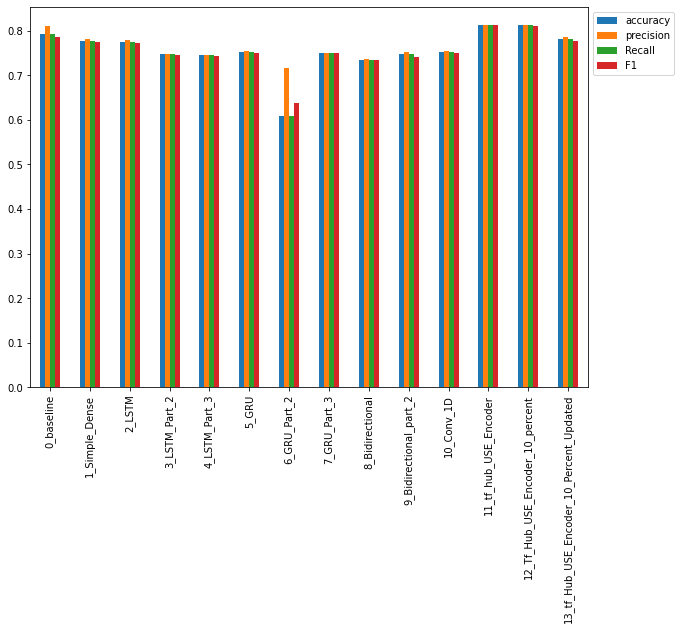

In [146]:
#Plot and Compare all of the kind of model_results
all_model_results.plot(kind="bar", figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0));

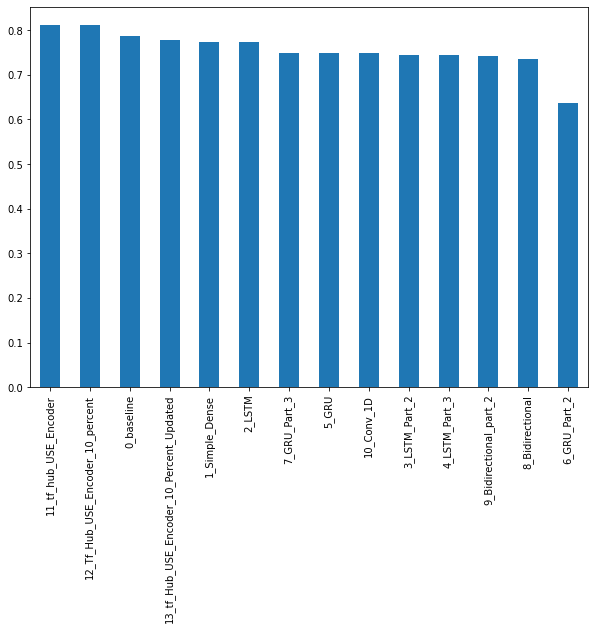

In [147]:
#Sort Model results by f1-score

all_model_results.sort_values("F1", ascending=False)["F1"].plot(kind="bar", figsize=(10, 7));

## **Uploading Model Training Logs**

In [148]:
!tensorboard dev upload --logdir ./model_logs/ \
  --name  'NLP Modelling Fundamentals'  \
  --description 'Compairing Multiple Different Types of Model Architecture' \
  --one_shot


***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./model_logs/

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) yes

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=373649185512-8v619h5kft38l4456nm2dj4ubeqsrvh6.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=openid+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&state=ysCVhz5noLbQ9Jl40c1XLk7L2PxEUn&prompt=consent&access_type=offline

## **Saving and Loading Pretrained Model**

**There are Two Formats to Save Model**

**1-HDF5 Format**

**2- Saved Model Format (By-Default)**

**We Saved TF Hub Feature Extractor Model**

In [149]:
model_12.save('model_12.h5')

In [150]:
#Loaded The Model 

loaded_model_12 = tf.keras.models.load_model('model_12.h5',
                                             custom_objects={"KerasLayer": hub.KerasLayer})

In [151]:
# How Does Our Loaded Model Perform 

loaded_model_12.evaluate(val_sentences, val_labels)

24/24 [==============================] - 1s 15ms/step - loss: 0.4261 - accuracy: 0.8123


[0.4261447787284851, 0.8123359680175781]

In [152]:
# Lets Save to the Saved Model

model_12.save('model_12_saved_model_format')

INFO:tensorflow:Assets written to: model_12_saved_model_format/assets


INFO:tensorflow:Assets written to: model_12_saved_model_format/assets


In [153]:
#Load in The Model from Saved Model Format

loaded_model_12_saved_model_format = tf.keras.models.load_model('model_12_saved_model_format') 
loaded_model_12_saved_model_format

In [154]:
# Evaluate The Model in Saved Model Format

loaded_model_12_saved_model_format.evaluate(val_sentences, val_labels)

24/24 [==============================] - 1s 16ms/step - loss: 0.4261 - accuracy: 0.8123


[0.4261447787284851, 0.8123359680175781]

## **Finding Most Wrong Examples**

**If our Best model is still isn't perfect, what examples is it getting wrong**

**And of Those Wrong Examples which one is it getting wrong (Those Prediction Probabilites closet to opposite one)**



In [155]:
# Download Pretrained Model

!wget https://storage.googleapis.com/ztm_tf_course/08_model_6_USE_feature_extractor.zip
unzip_data('08_model_6_USE_feature_extractor.zip')

--2022-04-16 19:18:08--  https://storage.googleapis.com/ztm_tf_course/08_model_6_USE_feature_extractor.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.189.128, 108.177.97.128, 108.177.125.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.189.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 960779165 (916M) [application/zip]
Saving to: ‘08_model_6_USE_feature_extractor.zip’

08_model_6_USE_feat 100%[===================>] 916.27M  55.1MB/s    in 15s     

2022-04-16 19:18:25 (61.1 MB/s) - ‘08_model_6_USE_feature_extractor.zip’ saved [960779165/960779165]



In [156]:
# Import Previously Trained Model

model_12_pretrained = tf.keras.models.load_model('08_model_6_USE_feature_extractor')

model_12_pretrained

In [157]:
# Make Predictions With Loaded Model From GS

model_12_pretrained_pred_probs = model_12_pretrained.predict(val_sentences)
model_12_pretrained_preds = tf.squeeze(tf.round(model_12_pretrained_pred_probs))
model_12_pretrained_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [158]:
# Create DataFrame with Validation Sentences , Validation Labels and Performing Model Prediction

val_df = pd.DataFrame({
    'text': val_sentences,
    'target': val_labels,
    'pred': model_12_pretrained_preds,
    'pred_prob': tf.squeeze(model_12_pretrained_pred_probs)
})

val_df.head()

,text,target,pred,pred_prob
0,DFR EP016 Monthly Meltdown - On Dnbheaven 2015...,0,0.0,0.159757
1,FedEx no longer to transport bioterror germs i...,0,1.0,0.747162
2,Gunmen kill four in El Salvador bus attack: Su...,1,1.0,0.988749
3,@camilacabello97 Internally and externally scr...,1,0.0,0.196229
4,Radiation emergency #preparedness starts with ...,1,1.0,0.707808


In [159]:
# Find The Wrong Predicton and Sort by Prediction Probabilities 

most_wrong = val_df[val_df['target']!= val_df['pred']].sort_values('pred_prob', ascending=False)
most_wrong

,text,target,pred,pred_prob
31,? High Skies - Burning Buildings ? http://t.co...,0,1.0,0.910196
759,FedEx will no longer transport bioterror patho...,0,1.0,0.876982
628,@noah_anyname That's where the concentration c...,0,1.0,0.852300
209,Ashes 2015: AustraliaÛªs collapse at Trent Br...,0,1.0,0.835454
251,@AshGhebranious civil rights continued in the ...,0,1.0,0.827213
...,...,...,...,...
411,@SoonerMagic_ I mean I'm a fan but I don't nee...,1,0.0,0.043918
233,I get to smoke my shit in peace,1,0.0,0.042087
38,Why are you deluged with low self-image? Take ...,1,0.0,0.038998
244,Reddit Will Now QuarantineÛ_ http://t.co/pkUA...,1,0.0,0.038949


In [160]:
# Lets Remind Ourselves of Target Labels

# 0-Not Disaster #1- Disaster

## **Visualize Most Wrong Prediction (Check out False Positive)**

In [161]:
for row in most_wrong[:10].itertuples():
  _,text,target,pred,pred_prob = row
  print(f"Target : {target}, Pred : {pred} , Prob : {pred_prob}")
  print(f"Text : \n{text}\n")
  print('---\n')

Target : 0, Pred : 1.0 , Prob : 0.9101957678794861
Text : 
? High Skies - Burning Buildings ? http://t.co/uVq41i3Kx2 #nowplaying

---

Target : 0, Pred : 1.0 , Prob : 0.8769820928573608
Text : 
FedEx will no longer transport bioterror pathogens in wake of anthrax lab mishaps http://t.co/lHpgxc4b8J

---

Target : 0, Pred : 1.0 , Prob : 0.8523001074790955
Text : 
@noah_anyname That's where the concentration camps and mass murder come in. 
 
EVERY. FUCKING. TIME.

---

Target : 0, Pred : 1.0 , Prob : 0.8354544043540955
Text : 
Ashes 2015: AustraliaÛªs collapse at Trent Bridge among worst in history: England bundled out Australia for 60 ... http://t.co/t5TrhjUAU0

---

Target : 0, Pred : 1.0 , Prob : 0.8272134065628052
Text : 
@AshGhebranious civil rights continued in the 60s. And what about trans-generational trauma? if anything we should listen to the Americans.

---

Target : 0, Pred : 1.0 , Prob : 0.814815878868103
Text : 
@SonofLiberty357 all illuminated by the brightly burning build

## **Making & Visualize Predictions On Test DataFrame**

In [163]:
test_sentences = test_df['text'].to_list()
test_sentences[:5]
test_samples = random.sample(test_sentences, 10)
for test_samples in test_samples:
  pred_prob = tf.squeeze(model_12_pretrained.predict([test_samples]))
  pred = tf.round(pred_prob)
  print(f"Pred : {int(pred)} , Prob : {pred_prob}")
  print(f"Text :\n {test_samples}\n")
  print('---\n')

Pred : 1 , Prob : 0.726610541343689
Text :
 @Vixuhn rip arson

---

Pred : 1 , Prob : 0.9648390412330627
Text :
 Calgary takes another beating from summer storms; City activates emergency plan http://t.co/u59DmRnlTK

---

Pred : 0 , Prob : 0.34154731035232544
Text :
 #BigData Deluge is out! http://t.co/khatZh7agZ

---

Pred : 0 , Prob : 0.09631282091140747
Text :
 NOOOOOOOOO! Don't do that!

---

Pred : 1 , Prob : 0.8640731573104858
Text :
 Criminals Who Hijack Lorries And Buses Arrested In Enugu (PHOTO) http://t.co/5cZ7eM9OTr

---

Pred : 1 , Prob : 0.7963244318962097
Text :
 @RockBottomRadFM Is one of the challenges on Tough Enough rescuing people from burning buildings?

---

Pred : 1 , Prob : 0.6388809084892273
Text :
 12000 Nigerian refugees repatriated from Cameroon http://t.co/LeLYa0vDOg read /////

---

Pred : 1 , Prob : 0.9526054263114929
Text :
 Multiple houses/buildings on fire in Kalispell http://t.co/1iyThVshgF

---

Pred : 0 , Prob : 0.05925457179546356
Text :
 Reddit Wil

## **The Speed/Score Trade Off**

In [164]:
#Lets Make A Function To Measure Time of Prediction 

import time
def pred_timer(model, sample):
  '''
  Times How Long A Model Takes To Make Prediction on samples
  '''

  start_time = time.perf_counter() #Gets Start Time
  model.predict(sample)
  end_time = time.perf_counter()
  total_time= end_time - start_time
  time_per_pred = total_time/len(sample)
  return total_time, time_per_pred 

In [166]:
#Calculate TFHUB Sentence Encoder Time Per Second Per Pred

model_12_total_pred_time, model_12_time_per_pred = pred_timer(model = model_12_pretrained, sample = val_sentences)
model_12_total_pred_time, model_12_time_per_pred

(0.4634606470003746, 0.0006082160721789693)

In [167]:
# Calculate Our Baseline Times Per Pred

model_0_total_pred_time, model_0_time_per_pred = pred_timer(model= model_0, sample= val_sentences)
model_0_total_pred_time, model_0_time_per_pred

(0.0705168770000455, 9.254183333339303e-05)

## **Visual The Graph**

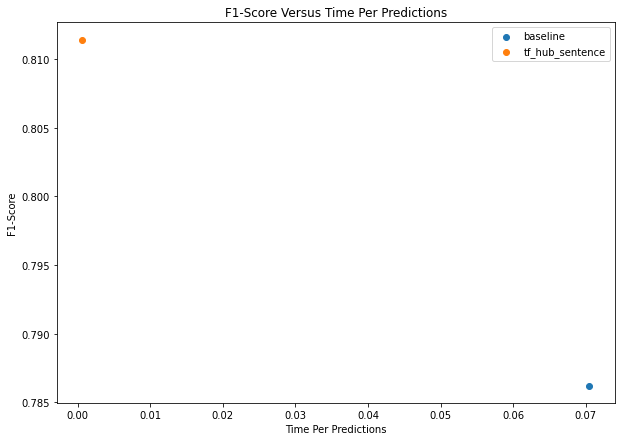

In [170]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.scatter(model_0_total_pred_time, baseline_results['F1'], label = 'baseline')
plt.scatter(model_12_time_per_pred, model_12_results['F1'], label='tf_hub_sentence')
plt.legend()
plt.title('F1-Score Versus Time Per Predictions')
plt.xlabel('Time Per Predictions')
plt.ylabel('F1-Score');

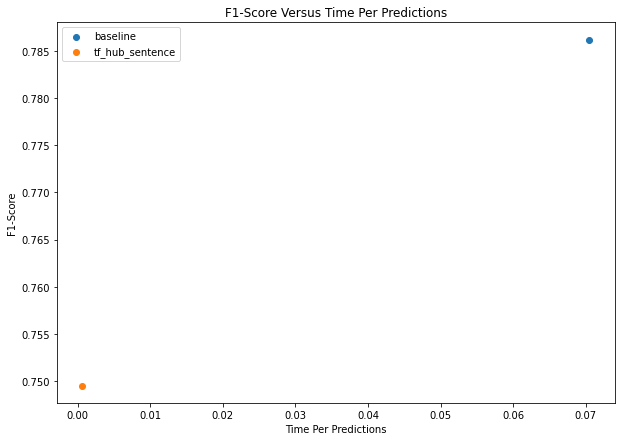

In [173]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.scatter(model_0_total_pred_time, baseline_results['F1'], label = 'baseline')
plt.scatter(model_12_time_per_pred, model_10_results['F1'], label='tf_hub_sentence')
plt.legend()
plt.title('F1-Score Versus Time Per Predictions')
plt.xlabel('Time Per Predictions')
plt.ylabel('F1-Score');

# **1-Check Whether The Tweet is Disaster or Not!**

### **Sample Tweet**

In [195]:
sample_tweet_1 = 'Reports that the smoke in Beirut sky contains nitric acid, which is toxic. Please share and refrain from stepping outside unless urge'

### **Predict Tweet**

In [196]:
def predict_on_sentence(model, sentence):
  """
  Uses model to make a prediction on sentence.

  Returns the sentence, the predicted label and the prediction probability.
  """
  pred_prob = model.predict([sentence])
  pred_label = tf.squeeze(tf.round(pred_prob)).numpy()
  print(f"Pred: {pred_label}", "(real disaster)" if pred_label > 0 else "(not real disaster)", f"Prob: {pred_prob[0][0]}")
  print(f"Text:\n{sentence}")

In [197]:
# Predict on diaster Tweet 1
predict_on_sentence(model=model_12, 
                    sentence=sample_tweet_1)

Pred: 1.0 (real disaster) Prob: 0.8591172099113464
Text:
Reports that the smoke in Beirut sky contains nitric acid, which is toxic. Please share and refrain from stepping outside unless urge
